In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from keras.utils import np_utils
import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import Adadelta

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #normalize
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')   #normalize
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)


class_num = 10

model = Sequential()
input_shape = (28, 28, 1)


model.add(Conv2D(32, (3, 3), padding="same", input_shape = input_shape))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(class_num))
model.add(Activation("softmax"))

model.summary() 

4423680/4422102 [==============================] - 19s 4us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (F

In [3]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = Adadelta(), metrics=['accuracy'])
train_model =model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.5511 - acc: 0.8045 - val_loss: 0.4029 - val_acc: 0.8444
Epoch 2/10
60000/60000 [==============================] - 309s 5ms/step - loss: 0.3524 - acc: 0.8757 - val_loss: 0.2994 - val_acc: 0.8919
Epoch 3/10
60000/60000 [==============================] - 319s 5ms/step - loss: 0.3016 - acc: 0.8912 - val_loss: 0.2717 - val_acc: 0.8989
Epoch 4/10
60000/60000 [==============================] - 315s 5ms/step - loss: 0.2718 - acc: 0.9033 - val_loss: 0.2563 - val_acc: 0.9057
Epoch 5/10
60000/60000 [==============================] - 309s 5ms/step - loss: 0.2475 - acc: 0.9119 - val_loss: 0.2413 - val_acc: 0.9133
Epoch 6/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.2303 - acc: 0.9176 - val_loss: 0.2594 - val_acc: 0.9078
Epoch 7/10
60000/60000 [==============================] - 289s 5ms/step - loss: 0.2127 - acc: 0.9228 - val_loss: 0.2366 - 

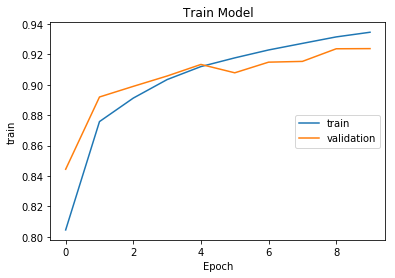

In [4]:
def show_train_model(train_model, train, validation):
    plt.plot(train_model.history[train])
    plt.plot(train_model.history[validation])
    plt.title('Train Model')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()

show_train_model(train_model, 'acc', 'val_acc')

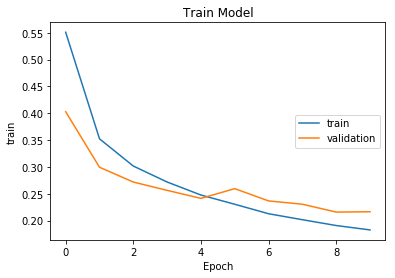

In [5]:
show_train_model(train_model, 'loss', 'val_loss')

In [6]:
import pandas as pd
y_predicted = model.predict(X_test)
y_predicted

array([[1.7536856e-08, 7.1178499e-09, 2.7773664e-08, ..., 1.8631186e-05,
        2.0780258e-08, 9.9996567e-01],
       [1.3209172e-06, 8.6998350e-13, 9.9999201e-01, ..., 1.4517706e-14,
        1.9876877e-10, 2.4131017e-14],
       [8.5891720e-09, 1.0000000e+00, 2.2724600e-09, ..., 1.4650376e-09,
        1.6859739e-10, 8.0404738e-11],
       ...,
       [1.2075135e-07, 1.5365990e-10, 1.2494888e-07, ..., 3.5688146e-08,
        9.9999213e-01, 1.2292076e-10],
       [1.5692203e-11, 1.0000000e+00, 1.9652551e-13, ..., 1.6108146e-11,
        1.9150626e-14, 1.4029958e-11],
       [2.6394382e-05, 3.3070232e-06, 7.0663998e-05, ..., 8.6708907e-03,
        3.4459154e-03, 1.1390396e-03]], dtype=float32)

In [7]:
column_y_predicted = np.argmax(y_predicted, axis = 1)
column_y_test = np.argmax(y_test, axis = 1)

pd.crosstab(column_y_test, column_y_predicted, rownames = ['label'], colnames = ['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,857,1,17,19,3,0,99,0,4,0
1,0,986,0,8,1,0,4,0,1,0
2,11,1,870,6,70,0,42,0,0,0
3,5,7,11,926,23,0,28,0,0,0
4,0,0,22,20,924,0,34,0,0,0
5,0,0,0,0,0,989,0,5,0,6
6,66,1,56,28,84,0,761,0,4,0
7,0,0,0,0,0,10,0,960,0,30
8,1,2,1,3,2,1,1,2,987,0
